In [4]:
using Luxor


(process:24680): GLib-GIO-WARNING **: 17:11:05.897: Unexpectedly, UWP app `XBMCFoundation.Kodi_19.0.500.0_x64__4n2hpmxwrvr6p' (AUMId `XBMCFoundation.Kodi_4n2hpmxwrvr6p!Kodi') supports 120 extensions but has no verbs


┌ Info: Frames for animation "test" are being stored in directory: 
│ 	 C:\Users\omrif\AppData\Local\Temp\jl_RcYa6G
└ @ Luxor C:\Users\omrif\.julia\packages\Luxor\XHa4Y\src\animate.jl:178
┌ Info: ... 6 frames saved in directory:
│ 	 C:\Users\omrif\AppData\Local\Temp\jl_RcYa6G
└ @ Luxor C:\Users\omrif\.julia\packages\Luxor\XHa4Y\src\animate.jl:200
┌ Info: GIF is: C:\Users\omrif\AppData\Local\Temp\jl_RcYa6G/test.gif
└ @ Luxor C:\Users\omrif\.julia\packages\Luxor\XHa4Y\src\animate.jl:229


Luxor.AnimatedGif("C:\\Users\\omrif\\AppData\\Local\\Temp\\jl_RcYa6G/test.gif")
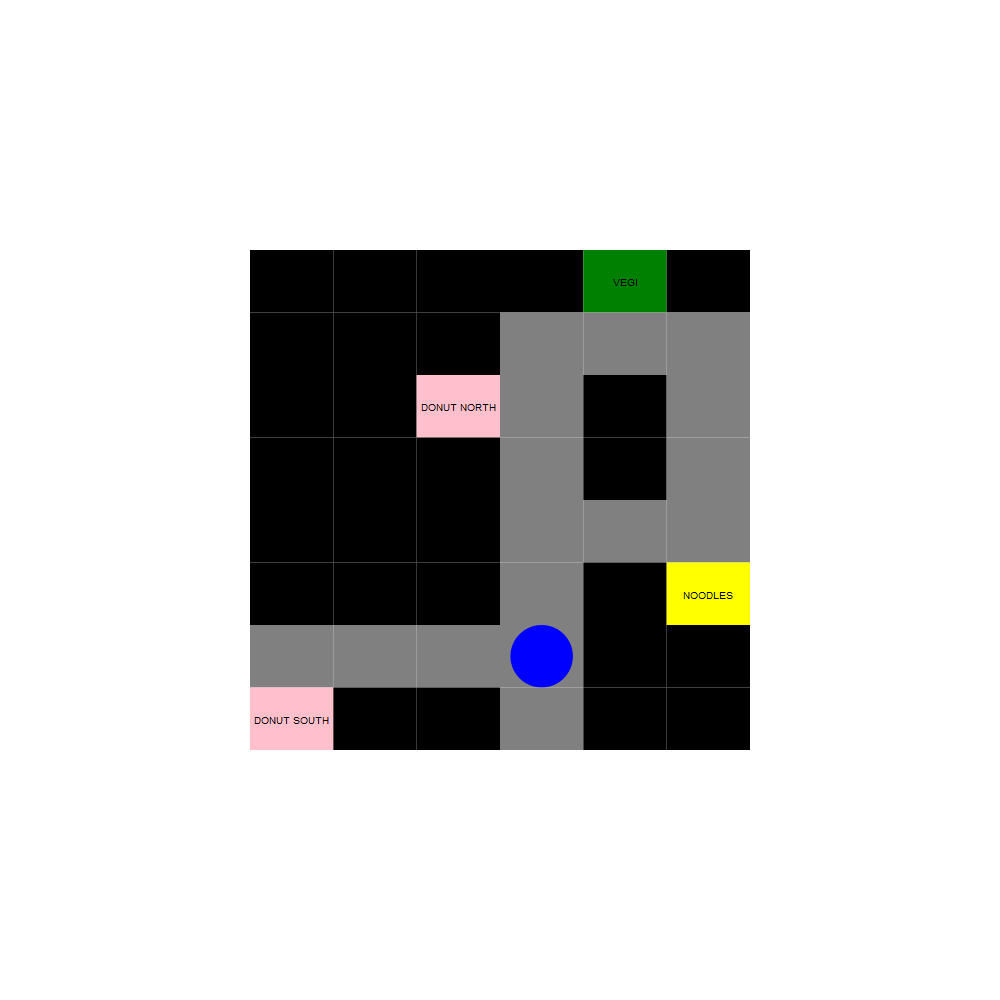

In [21]:
grid_world = [
    "#" "#" "#" "#" "V" "#" ;
    "#" "#" "#" "___" "___" "___";
    "#" "#" "DN" "___" "#" "___";
    "#" "#" "#" "___" "#" "___";
    "#" "#" "#" "___" "___" "___";
    "#" "#" "#" "___" "#" "N";
    "___" "___" "___" "___" "#" "#";
    "DS" "#" "#" "___" "#" "#";
]

grid_world_colors = Dict(
    "DS" => "pink", 
    "DN" => "pink",
    "V" => "green",
    "N" => "yellow", 
    "___"=> "gray",
    "#" => "black"
)

grid_world_names = Dict(
    "DS" => "DONUT SOUTH",
    "DN" => "DONUT NORTH",
    "V" => "VEGI",
    "N" => "NOODLES", 
    "___"=> "",
    "#" => ""
)
grid_size = size(grid_world)
start_state = [7,4]
function get_state(n)
    row = (n-1) ÷ grid_size[2] + 1
    col = (n-1) % grid_size[2] + 1
    return [row, col]
end

function get_tile(state)
    return grid_world[state...]
end

traj = [[7,4], [6, 4], [5, 4], [4, 4], [3, 4], [3, 3]]

# Drawing()
# origin()
# background("white")

demo = Movie(600, 600, "test", 1:length(traj))
function backdrop(scene, framenumber)
    background("white")
end

function frame(scene, framenumber)
    tiles = Tiler(500, 500, 8, 6, margin=0)
    agent_state = traj[framenumber]
    for (pos, n) in tiles
        state = get_state(n)
        tile = get_tile(state)
        sethue(grid_world_colors[tile])
        box(pos, tiles.tilewidth, tiles.tileheight, :fill)
        fontsize(10)
        sethue("black")
        textcentered(grid_world_names[tile], pos + Point(0, 5))
        if (state == agent_state)
            sethue("blue")
            circle(pos, min(tiles.tilewidth, tiles.tileheight) / 2, :fill)
        end
    end
end

animate(demo, [
    Scene(demo, backdrop),
    Scene(demo, frame)
    ],
    framerate=5,
    creategif=true)